# Visualise sequence similarity of embedded unknown sequences 
Sequence similarity obtained using clustal omega on the sequences, Annotating_Bacterial_Function_Space_DATA/bacillus_unknown_centroids.fa

In [2]:
#imports 
import pandas as pd
import re
import seaborn as sns

In [6]:
#read in percent identity matrix 
pim = pd.read_csv('../Annotating_Bacterial_Function_Space_DATA/bacillus_unknown_centroids_sequencesimilarity.tsv', '\t', header = None).drop(0, axis = 1).set_index(1).fillna(0)
pim.columns = pim.index

#read in which cluster each of these sequences belong to 
order = pd.read_csv('../Annotating_Bacterial_Function_Space_DATA/centroid_md5.tsv', sep = '\t').drop('Unnamed: 0', axis = 1)
order = order.sort_values('centroid', axis = 0)

#order percent identity matrix by the clusters 
pim = pim.loc[order['md5']][order['md5']]
order = order.reset_index()

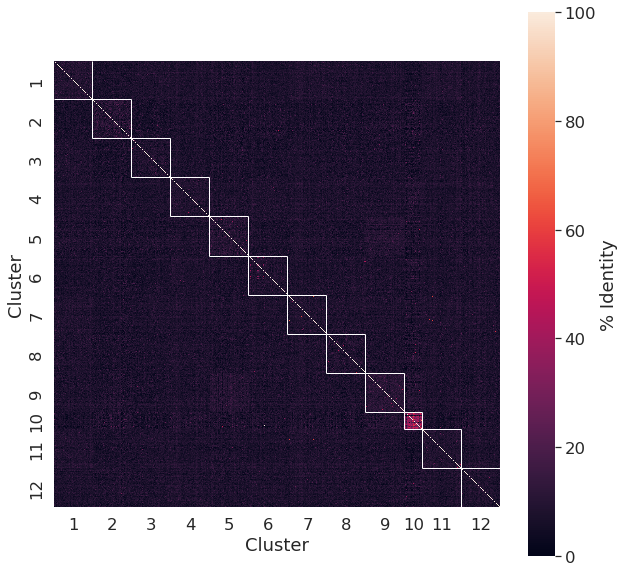

In [7]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.5)

#determine the boundaries of each cluster 
centroids = list(set(order['centroid']))
cluster_idx = [order[order['centroid'] == c].index[0] for c in centroids]
cluster_idx.append(len(order))

#generate the midpoint of each cluster 
label_idx = [int((cluster_idx[i+1]-cluster_idx[i])/2 + cluster_idx[i]) for i in range(len(cluster_idx)-1)]

#generate a list of labels for x and y axes
labels = []
centroid_labeldict = dict(zip(label_idx, centroids))
for i in range(len(pim)): 
    if i in label_idx: 
        labels.append(centroid_labeldict.get(i)+1) 
    else: 
        labels.append('')

figure= sns.heatmap(pim, square = True, yticklabels=labels, xticklabels=labels, cbar_kws={'label': '% Identity'})

#overlay white lines where clusters overlap 
line_idx = [order[order['centroid'] == c].index[-1]  for c in centroids]
for i in range(len(line_idx)): 
    if i == 0: 
        figure.hlines(line_idx[i],0,line_idx[i], colors = 'white', linewidth=1)
        figure.vlines(line_idx[i],0,line_idx[i], colors = 'white', linewidth=1)
    else: 
        figure.hlines(line_idx[i],line_idx[i-1],line_idx[i], colors = 'white', linewidth=1)
        figure.hlines(line_idx[i-1],line_idx[i-1],line_idx[i], colors = 'white', linewidth=1)
        figure.vlines(line_idx[i],line_idx[i-1],line_idx[i], colors = 'white', linewidth=1)
        figure.vlines(line_idx[i-1],line_idx[i-1],line_idx[i], colors = 'white', linewidth=1)
        
figure.set(xlabel='Cluster', ylabel='Cluster')
fig = figure.get_figure() 